In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import os
import re
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def add_parameters(dataset, parameters):
    parameters = parameters.split(',')
    #print(parameters)
    dataset['Threshold'] = pd.Series([parameters[0]] * len (dataset), index=dataset.index)
    dataset['Step_Size'] = pd.Series([int(parameters[1])] * len (dataset), index=dataset.index)
    dataset['Left_Offset'] = pd.Series([int(parameters[2])] * len (dataset), index=dataset.index)
    dataset['Right_Offset'] = pd.Series([int(parameters[3])] * len (dataset), index=dataset.index)
    dataset['Polynomial_Order'] = pd.Series([int(parameters[4].replace('poly', ''))] * len (dataset), index=dataset.index)
    return dataset

def add_to_dataset(dataset, directory, sm, qsink7, comment, parameters):
    data = pd.DataFrame()
    p = re.compile(r'(?:/|\\)')
    print('\nEs wurde ein Datensatz zu SM%g und QSinK7=%g in "%s" gefunden.' % (sm, qsink7, parameters))
    count = 0
    for file in os.listdir(directory):
        if file.endswith('.csv'):
            count += 1
            csv_data = pd.read_csv(os.path.join(directory, file), sep=';')
            csv_data['File'] = pd.Series([count] * len(csv_data), index=csv_data.index)
            data = data.append(csv_data)
    print('Es wurden %d CSV-Dateien im Datensatz gefunden.' % (count,))
    data['SpecMag'] = pd.Series([float(sm)] * len (data), index=data.index)
    data['QSinK7'] = pd.Series([float(qsink7)] * len (data), index=data.index)
    data['Comment'] = pd.Series([comment] * len (data), index=data.index)
    data['File_Count'] = pd.Series([count] * len (data), index=data.index)
    data = add_parameters(data, parameters)
    return dataset.append(data)

In [3]:
path_to_data = 'data/characterisation_Li,32,poly3'
dataset = pd.DataFrame()
print(dataset.head())

characterisation_count = 0
for root, directories, files in os.walk(path_to_data):
    match = re.search('SM(\d+(?:\.\d+)?)[/\\\\](-?\d+(?:\.\d+)?)[/\\\\](.*)[/\\\\](.*)$', root)
    if match:
        characterisation_count += 1
        sm = float(match.group(1))
        qsink7 = float(match.group(2))
        comment = match.group(3)
        parameters = match.group(4)
        dataset = add_to_dataset(dataset, root, sm, qsink7, comment, parameters)

dataset.sort_values(by=['SpecMag', 'QSinK7', 'Comment', 'File'])
print('\nEs wurden %d Ergebnisse einer Characterisierung gefunden.' % (characterisation_count,))

Empty DataFrame
Columns: []
Index: []

Es wurde ein Datensatz zu SM100 und QSinK7=-42 in "Li,32,64,64,poly3" gefunden.
Es wurden 5 CSV-Dateien im Datensatz gefunden.

Es wurde ein Datensatz zu SM100 und QSinK7=-42 in "Li,32,64,64,poly3" gefunden.
Es wurden 5 CSV-Dateien im Datensatz gefunden.

Es wurde ein Datensatz zu SM100 und QSinK7=0 in "Li,32,64,64,poly3" gefunden.
Es wurden 7 CSV-Dateien im Datensatz gefunden.

Es wurde ein Datensatz zu SM100 und QSinK7=0 in "Li,32,64,64,poly3" gefunden.
Es wurden 5 CSV-Dateien im Datensatz gefunden.

Es wurde ein Datensatz zu SM100 und QSinK7=-30 in "Li,32,64,64,poly3" gefunden.
Es wurden 5 CSV-Dateien im Datensatz gefunden.

Es wurde ein Datensatz zu SM100 und QSinK7=-30 in "Li,32,64,64,poly3" gefunden.
Es wurden 5 CSV-Dateien im Datensatz gefunden.

Es wurde ein Datensatz zu SM100 und QSinK7=-21 in "Li,32,64,64,poly3" gefunden.
Es wurden 7 CSV-Dateien im Datensatz gefunden.

Es wurde ein Datensatz zu SM100 und QSinK7=-36 in "Li,32,64,64,poly3"

In [4]:
dataset.head()

,y-position,y-error,x-position,x-error,left-position,left-error,right-position,right-error,width,width-error,...,File,SpecMag,QSinK7,Comment,File_Count,Threshold,Step_Size,Left_Offset,Right_Offset,Polynomial_Order
0,2126.622070,0.0,1478.552246,0.0,1218.0,0.0,1742.0,0.0,524.0,0.0,...,1,100.0,-42.0,20131219 ZLP,5,Li,32,64,64,3
1,2192.307861,0.0,1482.162231,0.0,1220.0,0.0,1744.0,0.0,524.0,0.0,...,1,100.0,-42.0,20131219 ZLP,5,Li,32,64,64,3
2,2256.770996,0.0,1485.436646,0.0,1224.0,0.0,1746.0,0.0,522.0,0.0,...,1,100.0,-42.0,20131219 ZLP,5,Li,32,64,64,3
3,2320.815918,0.0,1486.245850,0.0,1224.0,0.0,1754.0,0.0,530.0,0.0,...,1,100.0,-42.0,20131219 ZLP,5,Li,32,64,64,3
4,2383.989014,0.0,1488.666260,0.0,1228.0,0.0,1750.0,0.0,522.0,0.0,...,1,100.0,-42.0,20131219 ZLP,5,Li,32,64,64,3


In [5]:
dataset.describe()

,y-position,y-error,x-position,x-error,left-position,left-error,right-position,right-error,width,width-error,...,fitted-left-position,fitted-right-position,File,SpecMag,QSinK7,File_Count,Step_Size,Left_Offset,Right_Offset,Polynomial_Order
count,48133.000000,48133.0,48133.000000,48133.0,48133.000000,48133.0,48133.000000,48133.0,48133.000000,48133.0,...,48133.000000,48133.000000,48133.000000,48133.000000,48133.000000,48133.000000,48133.0,48133.0,48133.0,48133.0
mean,2099.651600,0.0,2158.827523,0.0,1980.214447,0.0,2338.969231,0.0,358.754784,0.0,...,1980.214447,2338.969231,4.398895,152.593107,-14.356637,7.797789,32.0,64.0,64.0,3.0
std,1144.594384,0.0,734.947918,0.0,743.416989,0.0,754.412202,0.0,289.669163,0.0,...,743.103755,754.075967,3.054619,56.937648,15.614758,3.611150,0.0,0.0,0.0,0.0
min,79.571564,0.0,241.745819,0.0,2.000000,0.0,472.000000,0.0,8.000000,0.0,...,-254.154491,504.554791,1.000000,100.000000,-42.000000,3.000000,32.0,64.0,64.0,3.0
25%,1103.932739,0.0,1724.007935,0.0,1506.000000,0.0,1868.000000,0.0,132.000000,0.0,...,1504.145420,1867.465440,2.000000,125.000000,-26.000000,5.000000,32.0,64.0,64.0,3.0
50%,2159.893799,0.0,2108.434570,0.0,1986.000000,0.0,2237.000000,0.0,326.000000,0.0,...,1986.278717,2237.840181,4.000000,125.000000,-15.000000,7.000000,32.0,64.0,64.0,3.0
75%,3087.947510,0.0,2606.445801,0.0,2430.000000,0.0,2858.000000,0.0,548.000000,0.0,...,2429.134227,2859.842716,6.000000,163.000000,0.000000,9.000000,32.0,64.0,64.0,3.0
max,4020.168701,0.0,3921.755615,0.0,3814.000000,0.0,4090.000000,0.0,4080.000000,0.0,...,3813.976173,4465.009241,19.000000,315.000000,48.000000,19.000000,32.0,64.0,64.0,3.0


In [6]:
dataset_multi = dataset.set_index(['SpecMag', 'QSinK7', 'Comment', 'Threshold', 'Step_Size', 'Left_Offset', 'Right_Offset', 'Polynomial_Order', 'File']).sort_index()
dataset_multi.head()

y-position  \
SpecMag QSinK7 Comment        Threshold Step_Size Left_Offset Right_Offset Polynomial_Order File               
100.0   -42.0  20131219 303eV Li        32        64          64           3                1      79.851128   
                                                                                            1     143.872314   
                                                                                            1     207.929337   
                                                                                            1     271.880951   
                                                                                            1     335.878418   

                                                                                                  y-error  \
SpecMag QSinK7 Comment        Threshold Step_Size Left_Offset Right_Offset Polynomial_Order File            
100.0   -42.0  20131219 303eV Li        32        64          64           3                1         0.0   
                                                                                            1         0.0   
                                                                                            1         0.0   
                                                                                            1         0.0   
                                                                                            1         0.0   

                                                                                                   x-position  \
SpecMag QSinK7 Comment        Threshold Step_Size Left_Offset Right_Offset Polynomial_Order File                
100.0   -42.0  20131219 303eV Li        32        64          64           3                1     2845.079590   
                                                                                            1     2845.171875   
                                                                                            1     2844.787598   
                                                                                            1     2844.329590   
                                                                                            1     2844.399170   

                                                                                                  x-error  \
SpecMag QSinK7 Comment        Threshold Step_Size Left_Offset Right_Offset Polynomial_Order File            
100.0   -42.0  20131219 303eV Li        32        64          64           3                1         0.0   
                                                                                            1         0.0   
                                                                                            1         0.0   
                                                                                            1         0.0   
                                                                                            1         0.0   

                                                                                                  left-position  \
SpecMag QSinK7 Comment        Threshold Step_Size Left_Offset Right_Offset Polynomial_Order File                  
100.0   -42.0  20131219 303eV Li        32        64          64           3                1            2570.0   
                                                                                            1            2570.0   
                                                                                            1            2572.0   
                                                                                            1            2572.0   
                                                                                            1            2574.0   

                                                                                                  left-error  \
SpecMag QSinK7 Comment        Threshold Step_Size Left_Offset Right_Offset 

Ich filtere den Datensatz so weit, dass nur noch die Werte für einen vorgegebenen SpecMag (hier 125) und QSinK7 <= 0 vorhanden sind. Daraus lässt sich direkt der Mittelwert bilden, welchen ich anschließend grafisch auftrage.

SpecMag100
             width     2x sigma
QSinK7                         
-42.0   930.226087  2091.778550
-36.0   460.083871    32.507252
-30.0   618.530435  1463.960994
-27.0   862.566667  1918.873332
-24.0   605.100000  1250.335608
-21.0   376.571429   570.986076
 0.0     57.965619   505.415182
r² für den linearen Fit: 0.655238


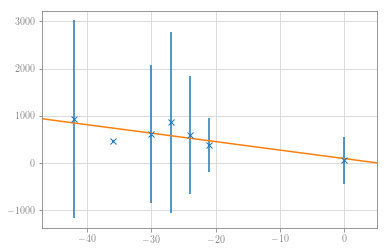



SpecMag125
             width    2x sigma
QSinK7                        
-40.0   689.106305   58.046749
-35.0   606.359447   45.157260
-33.0   566.472521   29.573171
-32.0   557.361828   30.062066
-30.0   537.014113   55.916796
-26.0   462.862903   32.422017
-25.0   455.852151   54.619582
-24.0   441.891935   49.686654
-20.0   363.815297   58.856736
-16.0   304.207258   64.062186
-15.0   271.052936   84.172245
-13.0   226.250896   86.483625
-10.0   171.611708  122.849780
-8.0    173.290323   50.462693
-5.0    105.919355   87.410409
 0.0     52.586636   47.068029
r² für den linearen Fit: 0.995865


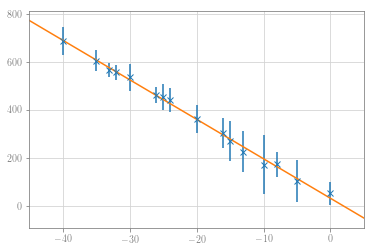



SpecMag163
             width  2x sigma
QSinK7                      
-26.0   558.968513  87.81924
r² für den linearen Fit: 0


/home/michael/git/Dissertation-git/Jupyter-Notebooks/lib/python3.6/site-packages/ipykernel/__main__.py:5: RankWarning: Polyfit may be poorly conditioned


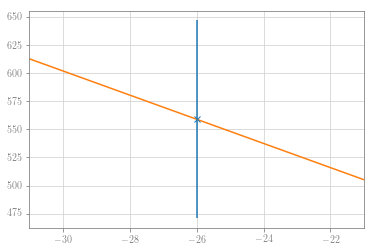



SpecMag200
             width    2x sigma
QSinK7                        
-18.0   551.533333  177.382863
-15.0   453.626667   94.569188
-12.0   368.840000   54.706578
-9.0    289.773333   62.957169
-6.0    206.973333   84.273427
-3.0    147.653333   63.097235
 0.0     94.297015   62.769018
r² für den linearen Fit: 0.991165


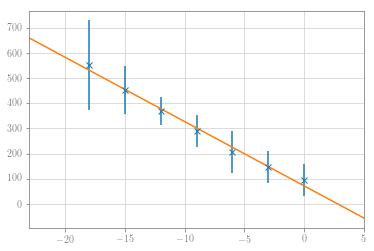



SpecMag250
              width   2x sigma
QSinK7                        
-30.0   1057.675806  33.502474
-12.0    462.746544  66.690421
r² für den linearen Fit: 1


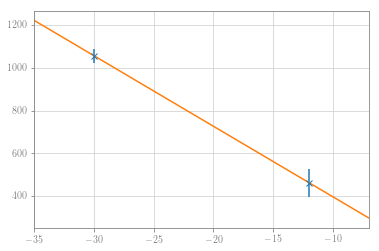



SpecMag315
              width   2x sigma
QSinK7                        
-24.0   1077.451613  50.109113
-16.0    769.602151  53.662931
-12.0    646.658065  90.542558
-11.0    597.009677  61.958762
-8.0     452.817204  83.316147
 0.0     174.101382  50.983590
r² für den linearen Fit: 0.99771


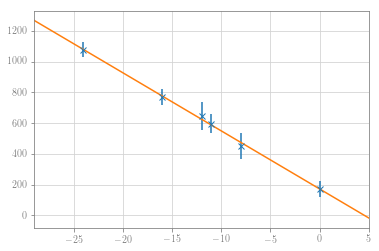

In [7]:
def plot_width_vs_qsink7(reduced_dataset):
    width = reduced_dataset.groupby('QSinK7').mean().width
    width_stdv = reduced_dataset.groupby('QSinK7').std().width * 2
    print(pd.DataFrame([width, width_stdv], index=('width', '2x sigma')).T)
    params_line = np.polyfit(x=width.index, y = width, deg=1)
    def g(x):
        return np.polyval(params_line, x)
    x_low = width.index.min() - 5
    x_high = width.index.max() + 5
    x_fit = np.linspace(x_low, x_high, 100)
    y_fit = g(x_fit)
    r2 = r2_score(width, g(width.index))
    print('r² für den linearen Fit: %g' % (r2,))
    plt.errorbar(x=width.index, y=width, yerr=width_stdv, fmt='x')
    plt.plot(x_fit, y_fit)
    plt.xlim(x_low, x_high)
    #Alternative: width.plot()

sm_values = (100, 125, 163, 200, 250, 315)
for sm in sm_values:
    print('SpecMag%d' % (sm,))
    data = dataset[(dataset['SpecMag'] == sm) &
                   (dataset['QSinK7'] <= 0) &
                   (dataset['Threshold'] == 'Li')
                  ]
    plot_width_vs_qsink7(data)
    plt.show()
    print('\n')